In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df = pd.read_csv('spam.csv' , encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [4]:
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [5]:
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))


def remove_stopwords_and_punctuation(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

df['cleaned_text'] = df['message'].apply(remove_stopwords_and_punctuation)
df

,label,message,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, U, å£750, Po..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[Ì, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, mood, Soany, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, id, interested, b..."


In [6]:
from sklearn.preprocessing import LabelEncoder  
labelencoder = LabelEncoder()
df['label'] = labelencoder.fit_transform(df['label'])
df.head()

,label,message,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...","[Go, jurong, point, crazy, Available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, dont, think, goes, usf, lives, around, t..."


In [7]:
df1 = df[df['label'] == 1]
df2 = df[df['label'] == 0]


In [8]:
list1 = [item for sublist in df1['cleaned_text'] for item in sublist]
list2 = [item for sublist in df2['cleaned_text'] for item in sublist]
list1

['Free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005',
 'Text',
 'FA',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'rateTCs',
 'apply',
 '08452810075over18s',
 'FreeMsg',
 'Hey',
 'darling',
 '3',
 'weeks',
 'word',
 'back',
 'Id',
 'like',
 'fun',
 'still',
 'Tb',
 'ok',
 'XxX',
 'std',
 'chgs',
 'send',
 'å£150',
 'rcv',
 'WINNER',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'å£900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'Claim',
 'code',
 'KL341',
 'Valid',
 '12',
 'hours',
 'mobile',
 '11',
 'months',
 'U',
 'R',
 'entitled',
 'Update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'Free',
 'Call',
 'Mobile',
 'Update',
 'Co',
 'FREE',
 '08002986030',
 'SIX',
 'chances',
 'win',
 'CASH',
 '100',
 '20000',
 'pounds',
 'txt',
 'CSH11',
 'send',
 '87575',
 'Cost',
 '150pday',
 '6days',
 '16',
 'TsandCs',
 'apply',
 'Reply',
 'HL',
 '4',
 'info',
 'URGENT',
 '1',
 'week',
 'FREE',

In [9]:
from collections import Counter
spam = Counter(list1).most_common(10)
ham = Counter(list2).most_common(10)

print(ham)

[('u', 716), ('2', 305), ('Im', 301), ('get', 290), ('ltgt', 276), ('U', 256), ('go', 231), ('know', 226), ('like', 217), ('got', 212)]


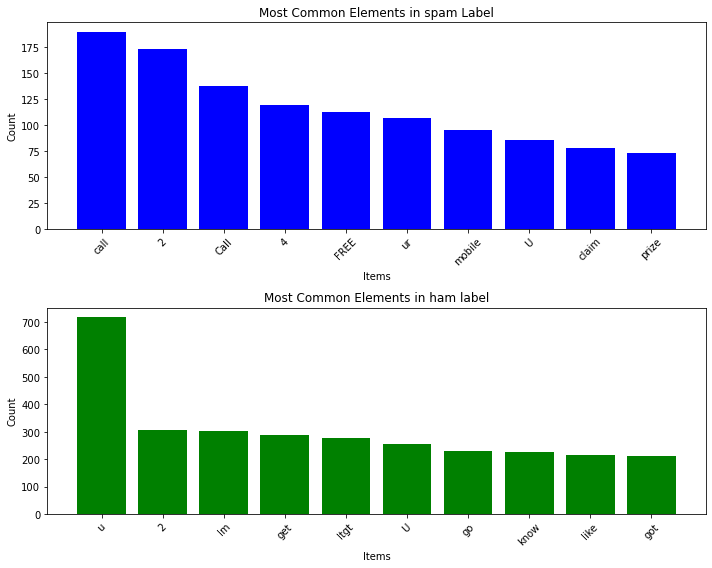

In [10]:
from matplotlib import pyplot as plt
# Unpack the most common elements into two lists
spam_items, spam_counts = zip(*spam) if spam else ([], [])
ham_items, ham_counts = zip(*ham) if ham else ([], [])

# Create a figure and axis for the plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot for list1 (spam)
ax[0].bar(spam_items, spam_counts, color='blue')
ax[0].set_title('Most Common Elements in spam Label')
ax[0].set_xlabel('Items')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

# Plot for list2 (ham)
ax[1].bar(ham_items, ham_counts, color='green')
ax[1].set_title('Most Common Elements in ham label')
ax[1].set_xlabel('Items')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [11]:
from nltk import bigrams

def find_most_common_bigrams(tokenized_list):
    bigram_list = list(bigrams(tokenized_list))
    bigram_counts = Counter(bigram_list)
    return bigram_counts.most_common(10)

most_common_bigrams_class_1 = find_most_common_bigrams(list1)
most_common_bigrams_class_2 = find_most_common_bigrams(list2)

print("10 Most Common Bigrams in Spam:")
for bigram, freq in most_common_bigrams_class_1:
    print(f"{bigram}: {freq}")

print("\n10 Most Common Bigrams in Ham:")
for bigram, freq in most_common_bigrams_class_2:
    print(f"{bigram}: {freq}")

10 Most Common Bigrams in Spam:
('Please', 'call'): 26
('prize', 'GUARANTEED'): 21
('GUARANTEED', 'Call'): 21
('å£1000', 'cash'): 19
('await', 'collection'): 19
('land', 'line'): 18
('every', 'week'): 18
('2', 'claim'): 17
('PO', 'Box'): 17
('Valid', '12hrs'): 16

10 Most Common Bigrams in Ham:
('gon', 'na'): 57
('call', 'later'): 50
('Ill', 'call'): 47
('Sorry', 'Ill'): 39
('wan', '2'): 31
('let', 'know'): 29
('dont', 'know'): 27
('r', 'u'): 25
('wan', 'na'): 22
('u', 'get'): 19


In [12]:
from nltk.util import trigrams


def find_most_common_trigrams(tokenized_list):
    bigram_list = list(trigrams(tokenized_list))
    bigram_counts = Counter(bigram_list)
    return bigram_counts.most_common(10)

most_common_bigrams_class_1 = find_most_common_trigrams(list1)
most_common_bigrams_class_2 = find_most_common_trigrams(list2)

print("10 Most Common Bigrams in Spam:")
for bigram, freq in most_common_bigrams_class_1:
    print(f"{bigram}: {freq}")

print("\n10 Most Common Bigrams in Ham:")
for bigram, freq in most_common_bigrams_class_2:
    print(f"{bigram}: {freq}")

10 Most Common Bigrams in Spam:
('prize', 'GUARANTEED', 'Call'): 20
('land', 'line', 'Claim'): 13
('PRIVATE', '2003', 'Account'): 13
('2003', 'Account', 'Statement'): 13
('shows', '800', 'unredeemed'): 12
('URGENT', 'trying', 'contact'): 11
('every', 'week', 'txt'): 11
('call', 'customer', 'service'): 10
('customer', 'service', 'representative'): 10
('guaranteed', 'å£1000', 'cash'): 10

10 Most Common Bigrams in Ham:
('Ill', 'call', 'later'): 41
('Sorry', 'Ill', 'call'): 38
('Im', 'gon', 'na'): 14
('u', 'wan', '2'): 13
('cant', 'pick', 'phone'): 12
('pick', 'phone', 'right'): 12
('phone', 'right', 'Pls'): 12
('right', 'Pls', 'send'): 12
('Pls', 'send', 'message'): 12
('U', 'wan', '2'): 8


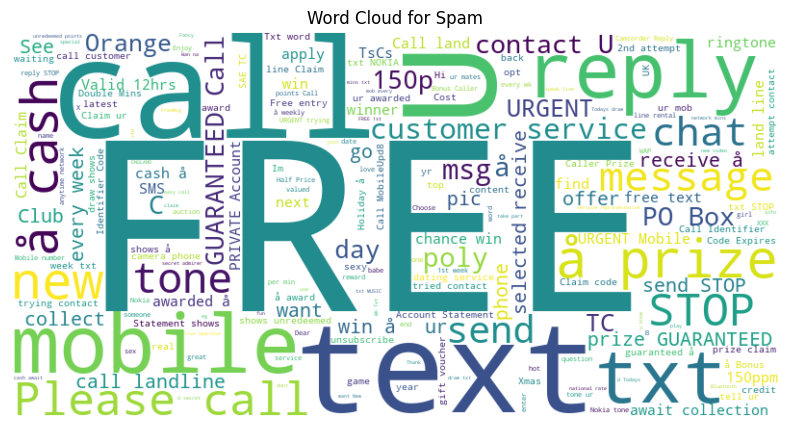

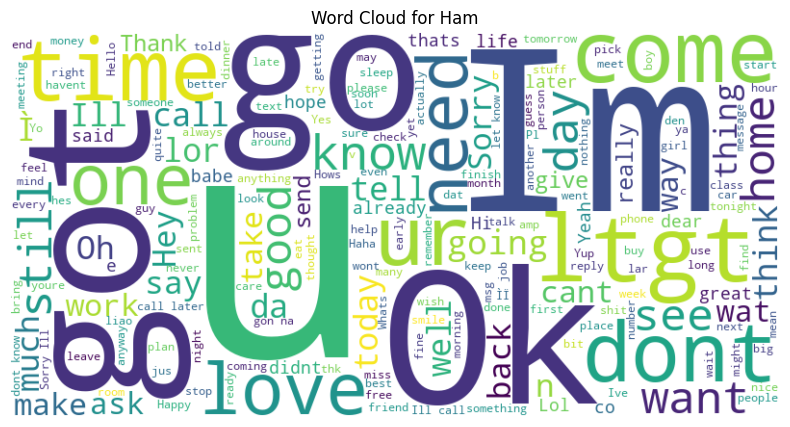

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(filtered_tokens, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(list1, "Word Cloud for Spam")
generate_wordcloud(list2, "Word Cloud for Ham")

In [95]:
##Bag of Words

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
vectors = X.toarray()
feature_names = vectorizer.get_feature_names_out()

print("Feature Names:", feature_names)
print("Vectors:")
print(vectors)


Feature Names: ['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']
Vectors:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [96]:
##BAG OF WORDS MODEL USING NAIVE BAYES
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score
X_train, X_test, y_train, y_test = train_test_split(vectors, df['label'], test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.97847533632287
F1 Score: 0.9205298013245033


In [97]:
##TF-IDF MODEL USING NAIVE BAYES
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])
vectors = X.toarray()
feature_names = vectorizer.get_feature_names_out()

X_train, X_test, y_train, y_test = train_test_split(vectors, df['label'], test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9623318385650225
F1 Score: 0.8372093023255814


In [98]:
## TF-IDF MODEL with preprocessing
import re

from nltk.stem import WordNetLemmatizer
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'http\S+', '', text)   # Remove URLs
    text = re.sub(r'<.*?>', '', text)     # Remove HTML tags
    text = re.sub(r'\d+', '', text)     ## remove numbers 
    
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    lemmatized_tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['tf-idf'] = df['message'].apply(preprocess_text)



In [99]:
df

,label,message,cleaned_text,tf-idf
0,0,"Go until jurong point, crazy.. Available only ...","[Go, jurong, point, crazy, Available, bugis, n...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]",ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]",u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, dont, think, goes, usf, lives, around, t...",nah dont think go usf life around though
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, U, å£750, Po...",nd time tried contact u u å pound prize claim ...
5568,0,Will Ì_ b going to esplanade fr home?,"[Ì, b, going, esplanade, fr, home]",ì_ b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...","[Pity, mood, Soany, suggestions]",pity mood soany suggestion
5570,0,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, id, interested, b...",guy bitching acted like id interested buying s...


In [100]:
vectors = TfidfVectorizer().fit_transform(df['tf-idf']).toarray()
feature_names = vectorizer.get_feature_names_out()

X_train, X_test, y_train, y_test = train_test_split(vectors, df['label'], test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Accuracy: 0.9650224215246637
F1 Score: 0.8505747126436781
